# Imports

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Loading data

In [4]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

# KNN

In [11]:
clf = KNeighborsClassifier(n_neighbors = 5)
print(clf.fit(x_train, y_train))
print(clf.predict(x_test))
print(clf.score(x_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[1 0 1 1 0 1 2 0 2 2 2 2 1 0 1 0 1 2 1 0 0 0 1 0 1 0 1 2 2 0]
1.0


In [15]:
confusion_matrix(clf.predict(x_test), y_test)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  8]], dtype=int64)

In [28]:
# Uisng KNN for 2 features in order to plot decision boundary
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(x_train[:,:2], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Decision boundary

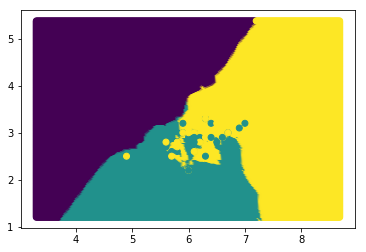

In [32]:
#We will plot decision boundary for 2 dimensions only
def make_grid(x, h = 0.02):
    x1_min = x[:,0].min() - 1
    x1_max = x[:,0].max() + 1
    x2_min = x[:,1].min() - 1
    x2_max = x[:,1].max() + 1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a,b)
    return xx, yy

xx, yy = make_grid(x_train[:,:2])
# print(np.c_[xx.ravel(), yy.ravel()])
# xx, yy
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()